# Matriz de Sombra

La matriz de sombra es una herramienta que permite establecer relaciones entre las variables que tienen todas sus observaciones y las que que poseen valores faltantes de manera que puedan compararse los estadísticos o visualizarlos de manera efectiva.

En otras palabras, nos ayuda a visualizar la influencia de valores completos en una variable sobre valores faltantes de otras variables o alguna posible relación entre valores faltantes de varias variables que son difíciles de percibir en el DataFrame. 

## Librerías

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

## Cargar Datos

Conjunto de datos referentes a encuestas de salud sobre la población de EE.UU. Archivo de tipo csv ubicado en la carpeta data. Contiene 35 variables y 245 observaciones

In [2]:
datos = pd.read_csv('./data/riskfactors.csv')

df = pd.DataFrame(datos)

df

,index,state,sex,age,weight_lbs,height_inch,bmi,marital,pregnant,children,...,smoke_100,smoke_days,smoke_stop,smoke_last,diet_fruit,diet_salad,diet_potato,diet_carrot,diet_vegetable,diet_juice
0,0,26,Female,49,190.0,64.0,32.68,Married,NaN,0,...,No,NaN,NaN,NaN,1095.0,261.0,104.0,156.0,521.0,12.0
1,1,40,Female,48,170.0,68.0,25.90,Divorced,NaN,0,...,No,NaN,NaN,NaN,52.0,209.0,52.0,0.0,52.0,0.0
2,2,72,Female,55,163.0,64.0,28.04,Married,NaN,0,...,No,NaN,NaN,NaN,36.0,156.0,52.0,24.0,24.0,24.0
3,3,42,Male,42,230.0,74.0,29.59,Married,NaN,1,...,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,32,Female,66,135.0,62.0,24.74,Widowed,NaN,0,...,Yes,Everyday,Yes,NaN,-7.0,261.0,209.0,261.0,365.0,104.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
240,240,10,Female,79,144.0,63.0,25.56,Widowed,NaN,0,...,No,NaN,NaN,NaN,-7.0,-7.0,-7.0,-7.0,-7.0,-7.0
241,241,46,Male,45,170.0,74.0,21.87,Divorced,NaN,2,...,No,NaN,NaN,NaN,52.0,52.0,52.0,24.0,52.0,24.0
242,242,15,Male,62,175.0,71.0,24.46,Divorced,NaN,0,...,Yes,Not@All,NaN,7.0,365.0,156.0,104.0,52.0,730.0,365.0
243,243,34,Female,62,138.0,64.0,23.74,Married,NaN,0,...,Yes,Everyday,No,NaN,730.0,0.0,24.0,156.0,104.0,0.0


## Configuracion general de las graficas

In [3]:
%matplotlib inline

# tamaño de los graficos
sns.set(
    rc={
        'figure.figsize':(8, 8)
    }
)

# estilo de los graficos
sns.set_style('whitegrid')

## Creación de la Matriz de Sombra

Los pasos para crear una Matriz de Sombra son los siguientes:

1. Identifica todos los valores faltantes

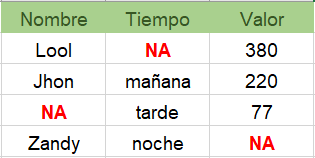

2. Reemplaza los valores faltantes con True(1) y el resto con False(0)

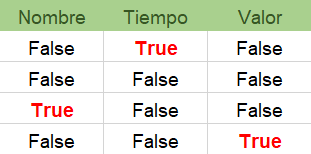

3. Reemplaza los True y False por abreviaciones mas informativas

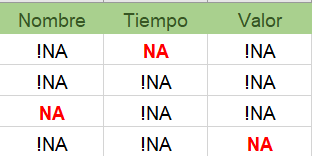

4. Añade un sufijo a los nombres de las variables

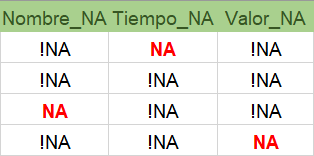

Una vez creada la Matriz de Sombra, se combina con el dataframe original para crear una tabla llamada Nabular que es la que será utilizada para crear los estadísticos y visualizaciones.

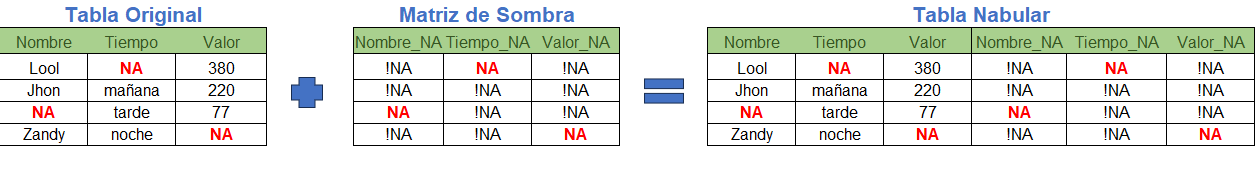

## Código para crear la Matriz de Sombra

En lo que sigue, vamos a crear la matriz de sombra para el DataFrame df especificando cada linea de codigo.

In [4]:
(
    df         # DataFrame
    .isna()    # Tabla de booleanos para cada valor de DataFrame
    .replace({ # reemplaza los valores booleanos por valores mas informativos
        False:'Not Missing',
        True:'Missing'
    })
    .add_suffix('_NA')  # agrega un sufijo al nombre de cada variable
)

,index_NA,state_NA,sex_NA,age_NA,weight_lbs_NA,height_inch_NA,bmi_NA,marital_NA,pregnant_NA,children_NA,...,smoke_100_NA,smoke_days_NA,smoke_stop_NA,smoke_last_NA,diet_fruit_NA,diet_salad_NA,diet_potato_NA,diet_carrot_NA,diet_vegetable_NA,diet_juice_NA
0,Not Missing,Not Missing,Not Missing,Not Missing,Not Missing,Not Missing,Not Missing,Not Missing,Missing,Not Missing,...,Not Missing,Missing,Missing,Missing,Not Missing,Not Missing,Not Missing,Not Missing,Not Missing,Not Missing
1,Not Missing,Not Missing,Not Missing,Not Missing,Not Missing,Not Missing,Not Missing,Not Missing,Missing,Not Missing,...,Not Missing,Missing,Missing,Missing,Not Missing,Not Missing,Not Missing,Not Missing,Not Missing,Not Missing
2,Not Missing,Not Missing,Not Missing,Not Missing,Not Missing,Not Missing,Not Missing,Not Missing,Missing,Not Missing,...,Not Missing,Missing,Missing,Missing,Not Missing,Not Missing,Not Missing,Not Missing,Not Missing,Not Missing
3,Not Missing,Not Missing,Not Missing,Not Missing,Not Missing,Not Missing,Not Missing,Not Missing,Missing,Not Missing,...,Not Missing,Missing,Missing,Missing,Missing,Missing,Missing,Missing,Missing,Missing
4,Not Missing,Not Missing,Not Missing,Not Missing,Not Missing,Not Missing,Not Missing,Not Missing,Missing,Not Missing,...,Not Missing,Not Missing,Not Missing,Missing,Not Missing,Not Missing,Not Missing,Not Missing,Not Missing,Not Missing
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
240,Not Missing,Not Missing,Not Missing,Not Missing,Not Missing,Not Missing,Not Missing,Not Missing,Missing,Not Missing,...,Not Missing,Missing,Missing,Missing,Not Missing,Not Missing,Not Missing,Not Missing,Not Missing,Not Missing
241,Not Missing,Not Missing,Not Missing,Not Missing,Not Missing,Not Missing,Not Missing,Not Missing,Missing,Not Missing,...,Not Missing,Missing,Missing,Missing,Not Missing,Not Missing,Not Missing,Not Missing,Not Missing,Not Missing
242,Not Missing,Not Missing,Not Missing,Not Missing,Not Missing,Not Missing,Not Missing,Not Missing,Missing,Not Missing,...,Not Missing,Not Missing,Missing,Not Missing,Not Missing,Not Missing,Not Missing,Not Missing,Not Missing,Not Missing
243,Not Missing,Not Missing,Not Missing,Not Missing,Not Missing,Not Missing,Not Missing,Not Missing,Missing,Not Missing,...,Not Missing,Not Missing,Not Missing,Missing,Not Missing,Not Missing,Not Missing,Not Missing,Not Missing,Not Missing


In [5]:
# Guardamos la Matriz de Sombra en una variable
shadow_matrix = (
    df         # DataFrame
    .isna()    # Tabla de booleanos para cada valor de DataFrame
    .replace({ # reemplaza los valores booleanos por valores mas informativos
        False:'Not Missing',
        True:'Missing'
    })
    .add_suffix('_NA')  # agrega un sufijo en cada variable
)

## Código para crear la Tabla Nabular

Concatenamos la tabla de df con la matriz de sombra.

In [6]:
df_Nabular = pd.concat( # concatenamos df y shadow_matrix
    [df, shadow_matrix],
    axis='columns'
)

df_Nabular

,index,state,sex,age,weight_lbs,height_inch,bmi,marital,pregnant,children,...,smoke_100_NA,smoke_days_NA,smoke_stop_NA,smoke_last_NA,diet_fruit_NA,diet_salad_NA,diet_potato_NA,diet_carrot_NA,diet_vegetable_NA,diet_juice_NA
0,0,26,Female,49,190.0,64.0,32.68,Married,NaN,0,...,Not Missing,Missing,Missing,Missing,Not Missing,Not Missing,Not Missing,Not Missing,Not Missing,Not Missing
1,1,40,Female,48,170.0,68.0,25.90,Divorced,NaN,0,...,Not Missing,Missing,Missing,Missing,Not Missing,Not Missing,Not Missing,Not Missing,Not Missing,Not Missing
2,2,72,Female,55,163.0,64.0,28.04,Married,NaN,0,...,Not Missing,Missing,Missing,Missing,Not Missing,Not Missing,Not Missing,Not Missing,Not Missing,Not Missing
3,3,42,Male,42,230.0,74.0,29.59,Married,NaN,1,...,Not Missing,Missing,Missing,Missing,Missing,Missing,Missing,Missing,Missing,Missing
4,4,32,Female,66,135.0,62.0,24.74,Widowed,NaN,0,...,Not Missing,Not Missing,Not Missing,Missing,Not Missing,Not Missing,Not Missing,Not Missing,Not Missing,Not Missing
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
240,240,10,Female,79,144.0,63.0,25.56,Widowed,NaN,0,...,Not Missing,Missing,Missing,Missing,Not Missing,Not Missing,Not Missing,Not Missing,Not Missing,Not Missing
241,241,46,Male,45,170.0,74.0,21.87,Divorced,NaN,2,...,Not Missing,Missing,Missing,Missing,Not Missing,Not Missing,Not Missing,Not Missing,Not Missing,Not Missing
242,242,15,Male,62,175.0,71.0,24.46,Divorced,NaN,0,...,Not Missing,Not Missing,Missing,Not Missing,Not Missing,Not Missing,Not Missing,Not Missing,Not Missing,Not Missing
243,243,34,Female,62,138.0,64.0,23.74,Married,NaN,0,...,Not Missing,Not Missing,Not Missing,Missing,Not Missing,Not Missing,Not Missing,Not Missing,Not Missing,Not Missing


## Comparando Estadísticos entre Variables

Teniendo la tabla nabular del DataFrame, podemos pasar a crear estadisticos y visualizaciones efectivas sobre los valores faltantes y su influencia sobre las variables. Los estadísticos nos van a permitir medir la influencia de los valores faltantes de una variable sobre los valores completo de otra.

### Estadística de la Variable Age en función de los valores faltantes de Weight

Para ello, agrupamos los valores de Weight pertenecientes a la matriz de sombra con los valores de Age como sigue: 

In [7]:
(
    df_Nabular                          # tabla nabular de df
    .groupby(['weight_lbs_NA'])['age']  # agrupacion de las variables
    .describe()                         # resumen estadistico
    .reset_index()                      # reseteo de los indices de la tabla
)

,weight_lbs_NA,count,mean,std,min,25%,50%,75%,max
0,Missing,10.0,60.100000,13.706851,37.0,52.25,62.5,65.0,82.0
1,Not Missing,235.0,58.021277,17.662904,7.0,47.50,59.0,70.0,97.0


La tabla nos muestra el resumen estadístico donde observamos que en los valores completos de Weight, la edad media es de 58 y la edad máxima es de 97. Mientras que para valores ausentes de Weight, la edad media es de 60 y la edad maxima es de 82. La cercanía entre ambos resultados indica que la presencia de valores faltantes de Weight no influye significativamente sobre los valores completos de Age y por tanto no están relacionados.

### Estadística de la variable Age en función de los valores faltantes de Pregnant

In [8]:
(
    df_Nabular                          # tabla nabular de df
    .groupby(['pregnant_NA'])['age']  # agrupacion de las variables
    .describe()                         # resumen estadistico
    .reset_index()                      # reseteo de los indices de la tabla
)

,pregnant_NA,count,mean,std,min,25%,50%,75%,max
0,Missing,215.0,61.590698,15.430577,9.0,52.0,62.0,71.5,97.0
1,Not Missing,30.0,33.133333,9.212934,7.0,29.5,34.0,40.0,44.0


De la tabla observamos que para los valores completos de Pregnant, la edad media es de 33 y la edad máxima de 44 (edad donde las mujeres alcanzan su pico de reproductividad). Mientras que para valores ausentes de Pregnant, la edad media es de 61 y la edad máxima de 97. Esta amplia diferencia y la relación entre la edad y el estado de embarazo indica que la ausencia de valores faltantes en Pregnant esta relacionado con la edad. 

### Estadística de la variable Weight en función de los valores faltantes de bmi

In [9]:
(
    df_Nabular                          # tabla nabular de df
    .groupby(['bmi_NA'])['weight_lbs']  # agrupacion de las variables
    .describe()                         # resumen estadistico
    .reset_index()                      # reseteo de los indices de la tabla
)

,bmi_NA,count,mean,std,min,25%,50%,75%,max
0,Missing,1.0,166.000000,NaN,166.0,166.0,166.0,166.0,166.0
1,Not Missing,234.0,174.303419,44.792869,96.0,144.0,170.0,195.0,410.0


La tabla nos muestras que para valores completos de bmi, el Peso medio es de 174 y el Peso maximo es 410. Mientras que para valores faltantes de bmi, el Peso medio es de 166 y el Peso maximo de 166 es decir que no existe gran diferencia. La cercania entre ambor resultados indica que la presencia de valores faltantes en bmi no afecta los valores de Peso y por tanto ambas variables no esta relacionadas.

## Visualización de Valores Faltantes mediante la Matriz de Sombra

La visualización de valores faltantes en una variable, permite detectar si está ocurriendo un sesgo debido a la presencia o ausencia de valores en otra variable. Además, ayuda a comparar una variable con otra que posee valores faltantes. Estos aportes hacen que este método sea muy efectivo para establecer relaciones entre variables.

### Diagrama de Caja: Comparando los valores faltantes de Weight con la variable Age

<AxesSubplot:xlabel='weight_lbs_NA', ylabel='age'>

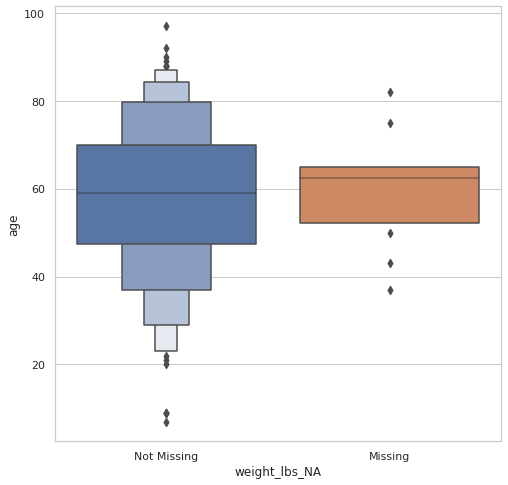

In [10]:
(
    df_Nabular                          # tabla nabular de df
    .pipe(                              # aplicar una funcion lambda
        lambda df:(
            sns.boxenplot(              # diagrama de caja de seaborn
                data=df,                # datos a graficar
                x='weight_lbs_NA',      # variable en x
                y='age'                 # variable en y
            )
        )
    )
)

El diagrama nos muestra que los valores de Weight están levemente sesgados por encima de 60 años (Diagrama naranja) con una media mayor a dicha edad y concentrados en un rango de edad de 50 a 65 años. Mientras que la media de lo valores completos de Weight es de 60 años (Diagrama azul). La cercanía entre ambas medias indican que la presencia de valores faltantes de Weight no influyen significativamente sobre la edad. 

### Gráfica de Densidad: comparando valores faltantes de Weight con la variable Age

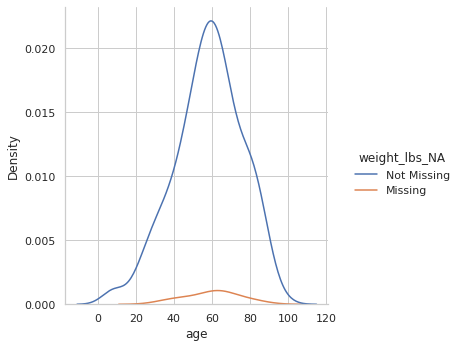

In [11]:
(
    df_Nabular                          # tabla nabular de df
    .pipe(                              # aplicar una funcion lambda
        lambda df: (
            sns.displot(                # Grafica de densidad de seaborn
                data=df,                # datos a graficar
                x = 'age',              #variable de distribucion
                hue = 'weight_lbs_NA',  #variable de comparacion
                kind= 'kde'             #distribucion de densidad
            )
        )
    )
)

Esta grafica tambien evidencia que los valores faltantes de Weight estas sesgados hacia la derecha de la edad de 60 años. Debido a poca cantidad de valores faltantes en este caso, no resulta ser una buena visualización de la diferencia entre las densidades.